<a href="https://colab.research.google.com/github/EdsonFrota/An-lise_Video_Games_EDSON/blob/main/An%C3%A1lise_Video_Games_EDSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise das colunas

Deve-se realizar uma verificação dos dados contidos em cada coluna do *dataset* a fim de notar se estes estão compatíveis. 

### ***'Global_Sales'***

Coluna ***'Global_Sales'*** deve ser uma soma das colunas ***'NA_Sales'***, ***'EU_Sales'***, ***'JP_Sales'*** e ***'Other_Sales'***.

$$ Global\_Sales = NA\_Sales + EU\_Sales + JP\_Sales + Other\_Sales $$

In [ ]:
# mask for data filtering
mask = vgsales['NA_Sales'] + vgsales['EU_Sales'] + vgsales['JP_Sales'] + vgsales['Other_Sales'] != vgsales['Global_Sales']

In [ ]:
# Percentage of columns with wrong values
print ('{:.2f}% do dataset tem inconsistência na coluna \'Global_Sales\'.'.format((mask.sum() / len(vgsales.index)) * 100))

40.80% do dataset tem inconsistência na coluna 'Global_Sales'.


Com isso, a coluna 'Global_Sales' deve ser atualizada para retirar tais inconsistências em seus valores. 

In [ ]:
# Global_Sales column update
vgsales['Global_Sales'] = vgsales['NA_Sales'] + vgsales['EU_Sales'] + vgsales['JP_Sales'] + vgsales['Other_Sales']

### ***'Year'***

Precisa verificar os dados presentes na coluna ***'Year'***.

In [ ]:
# Checking every year of the column
vgsales.Year.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

Diante disso, a coluna 'Year' não possui valores incoerentes.

### 'Genre'

Quais são os generos dos jogos?

In [ ]:
# Discovering game genres
vgsales.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Os nomes estão coerentes, ou seja, não há um erro ortográfico. Logo não existe a necessidade de tratar está *feature*. 

### 'Platform'

Quais são as plataformas?

In [ ]:
# Discovering every platform
vgsales.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Import Dataset - [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

In [ ]:
# Import library pandas
import pandas as pd

# Reading the csv vgsales that contains the Video Game Sales DataFrame
vgsales = pd.read_csv('vgsales.csv', index_col='Rank')

Em seguida, nota-se uma simples visualização das 5 (cinco) primeiras linhas do *dataset*.

In [ ]:
# Visualizing the 5 first rows
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Além disso, para fins de análise posteriores, abaixo tem-se uma informação sobre cada coluna do *dataset*.

In [ ]:
# Column information
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


A partir da visualização acima, nota-se que os tipos das variáveis são adequados para cada coluna, ou seja, colunas que são representadas por números estão representadas pelo tipo *float64* e colunas que possuem textos estão representadas pelo tipo *object*.

No entanto, observa-se que há valores ausentes em certas colunas. Isso pode ser notado na tabela a seguir.

In [ ]:
# Counting missing values in each column
vgsales.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Temos 271 valores ausentes na coluna ***Year*** e 58 valores ausentes na coluna ***Publisher***. Como tais colunas necessitam de ter valores reais, ou seja, nenhum método, seja média, mediana, moda ou método de propagação de valores, não produziriam um preenchimento adequado dos dados. 

Com base nisto, existe duas possibilidades para a eliminação deste problema. A primeira possibilidade é a eliminação dos casos, ou seja, das linhas do *dataset*, que contém tais valores ausentes. A segunda possiblidade é a eliminação das colunas com valores ausentes.

Dado que tais informações são cruciais para certas inferências procuradas neste *dataset*, os casos com valores faltosos seram retirados do *dataset*.

In [ ]:
# Removing rows with missing values
vgsales.dropna(axis='rows', inplace=True)

Por fim precisa arrumar o tipo da coluna ***'Year'***, modificando ela para inteiro.

In [ ]:
# Modifying Year to integer
vgsales.Year = vgsales.Year.astype('int64')

## Correlação das Features

Utilizando do modulo *seaborn* será realizado a análise de correlação das features. 

In [ ]:
# Import library seaborn
import seaborn as sns

# Import module matplotlib.pyplot
import matplotlib.pyplot as plt

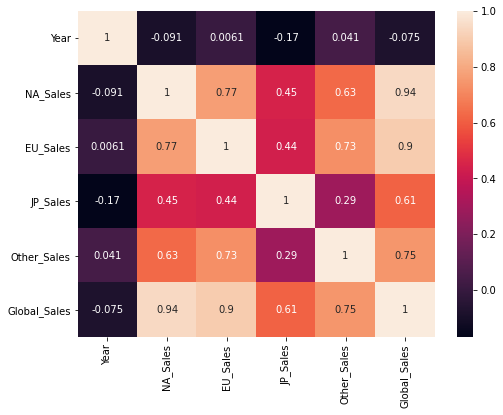

In [ ]:
# Create a figure
plt.figure(figsize=(8,6))

# Build correlation map
sns.heatmap(vgsales.corr(), annot=True)

# Show the figure
plt.show()

Observa-se pelo mapa de correlação que o ano de lançamento do jogo não é uma variável determinante para o sucesso nas vendas deste. 

## Qual **genero**, **publisher** e **plataforma** mais popular na América do Norte, na Europa e no Japão?

In [ ]:
# Define the regions
regionals = ['NA_Sales', 'EU_Sales', 'JP_Sales']

# Define the features
features = ['Platform', 'Genre', 'Publisher']

# Showing the most popular genre, publisher and platform of each region
for i in regionals:
  for j in features:
    most_popular = vgsales.groupby(j)[i].sum().sort_values(ascending=False).head(1)
    display(most_popular)
    print('\n')

Platform
X360    594.33
Name: NA_Sales, dtype: float64

Genre
Action    861.77
Name: NA_Sales, dtype: float64

Publisher
Nintendo    815.75
Name: NA_Sales, dtype: float64

Platform
PS3    340.47
Name: EU_Sales, dtype: float64

Genre
Action    516.48
Name: EU_Sales, dtype: float64

Publisher
Nintendo    418.3
Name: EU_Sales, dtype: float64

Platform
DS    175.02
Name: JP_Sales, dtype: float64

Genre
Role-Playing    350.29
Name: JP_Sales, dtype: float64

Publisher
Nintendo    454.99
Name: JP_Sales, dtype: float64

**Nintendo** é a produtora que mais vende nas três regiões.

**Ação** é o genero mais vendido na América do Norte e Europa, mas no Japão **Role-Playing** é mais famoso.

Em relação a plataforma, nas três regiões as preferências são distintas.

## Jogo mais popular em cada região?



In [ ]:
# Showing the most popular game in each region
for i in regionals:
    display(vgsales.sort_values(by=[i], ascending=False).head(3))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


*   América do Norte: Wii Sports, Super Mario Bros. e Duck Hunt;
*   Europa: Wii Sports, Mario Kart Wii e Wii Sports Resort;
*   Japão: Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver e Super Mario Bros.



## Qual genero mais vendido em todo mundo?

In [ ]:
# Showing the best selling genre worldwide
display(vgsales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(3))

Genre
Action     1721.82
Sports     1308.84
Shooter    1025.69
Name: Global_Sales, dtype: float64

Nota-se que o genero de **Ação** é o mais vendido em todo o mundo, seguido por ***Sports*** e ***Shooter***.

## Como é a tendência das vendas dos jogos diante do seu lançamento?

In [ ]:
# Grouping by year and adding their global sales
year_groupby = vgsales.groupby('Year')['Global_Sales'].sum()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


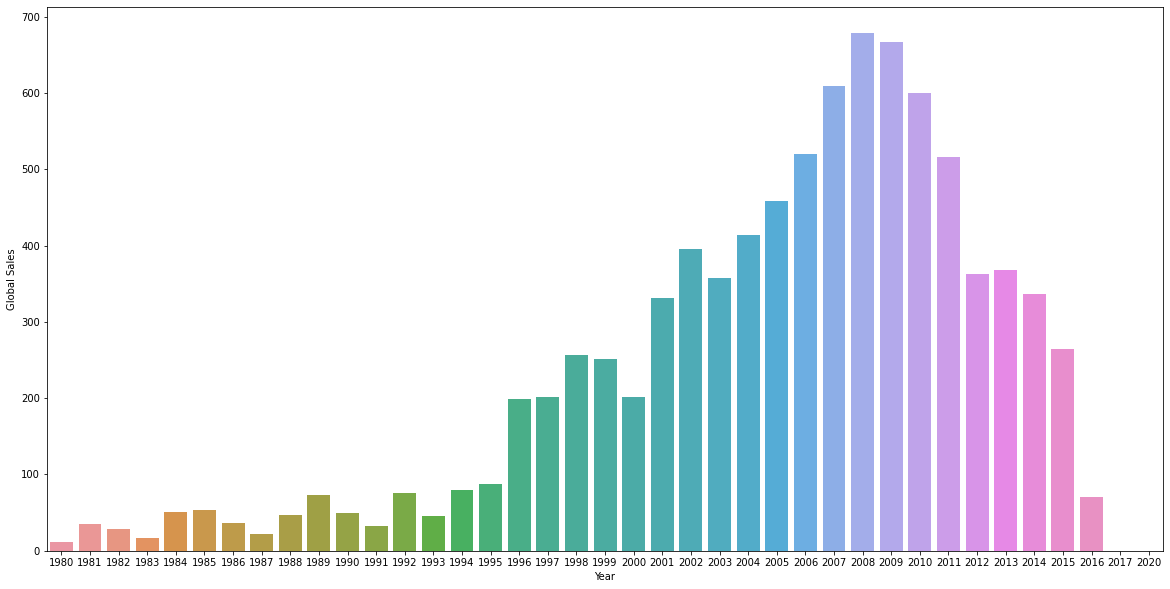

In [ ]:
# Create a figure
plt.figure(figsize=(20,10))

# Build a bar plot
sns.barplot(year_groupby.index, year_groupby)

# Labeling the axes
plt.xlabel('Year')
plt.ylabel('Global Sales')

# Show the figure
plt.show()

Pode-se observar que os jogos lançados entre 2007 e 2010 possuem uma grande venda. Enquanto jogos lançados antes de 2000 não foram vendidos em grande quantidade. Além disso, nota-se que há uma redução na venda dos jogos mais recentes. 